# Redes Neurais

In [3]:
using Flux, Plots, DataFrames, CSV 


<center>
<img title="a title" alt="Alt text" src="data/applePic.png" style="width: 100px;">
<img title="a title" alt="Alt text" src="data/bananaPic.png" style="width: 100px;">
</center>


In [5]:
apples = DataFrame(CSV.File("data/apples.dat",delim='\t', normalizenames=true));
bananas = DataFrame(CSV.File("data/bananas.dat",delim='\t',normalizenames=true));

In [7]:
[apples, bananas]

2-element Vector{DataFrame}:
 492×5 DataFrame
 Row │ height  width  red       green     blue     
     │ Int64   Int64  Float64   Float64   Float64  
─────┼─────────────────────────────────────────────
   1 │     90     99  0.501466  0.229304  0.148436
   2 │     94     99  0.434225  0.128667  0.108166
   3 │     94     99  0.43412   0.128334  0.108348
   4 │     94     99  0.432922  0.127469  0.106358
   5 │     94     99  0.433292  0.126873  0.106027
   6 │     94     99  0.432438  0.127182  0.105781
   7 │     94     99  0.432922  0.127296  0.106408
   8 │     95     99  0.431167  0.126159  0.104195
   9 │     95     99  0.431867  0.125932  0.104244
  10 │     95     99  0.43034   0.126404  0.103801
  11 │     95     99  0.43023   0.125699  0.104274
  ⋮  │   ⋮       ⋮       ⋮         ⋮         ⋮
 483 │     98     99  0.460158  0.141178  0.110293
 484 │     98     99  0.461967  0.142167  0.111156
 485 │     98     99  0.462939  0.144067  0.11163
 486 │     99     99  0.464322  0.1438

In [102]:
x_apples = [ [row.red,row.green] for row in eachrow(apples)];
x_bananas= [ [row.red,row.green] for row in eachrow(bananas)];


# Dados  
$y_{i}=0,$ se $i$ for maça

$y_{i}=1,$ se $i$ for banana


In [103]:
xs = [x_apples;x_bananas];

In [104]:
ys = [fill(0,size(x_apples)); fill(1,size(x_bananas))];

## Modelos de um Neuronio
<center>
<img src="https://media.istockphoto.com/photos/generic-blue-neuron-cell-model-isolated-on-a-white-background-with-picture-id1222094622?k=20&m=1222094622&s=612x612&w=0&h=zY9l58F5jXg4PsJWrMc0IjXawO6QCgbpVzblJ2S-KnU=" style="width:300px">
<img src="data/single-neuron.png" style="width:300px">
</center>

In [105]:
modelB =  Dense(2,1,tanh) 

Dense(2 => 1, tanh)  # 3 parameters

In [106]:
xs[1]

2-element Vector{Float64}:
 0.5014661151631883
 0.22930441097534052

In [107]:
Loss(x,y) = Flux.mse(modelB(x),y)

Loss (generic function with 1 method)

In [108]:
#?ADAM
data = zip(xs,ys);


In [109]:
Loss(xs[1],ys[1])

0.008633532045164347

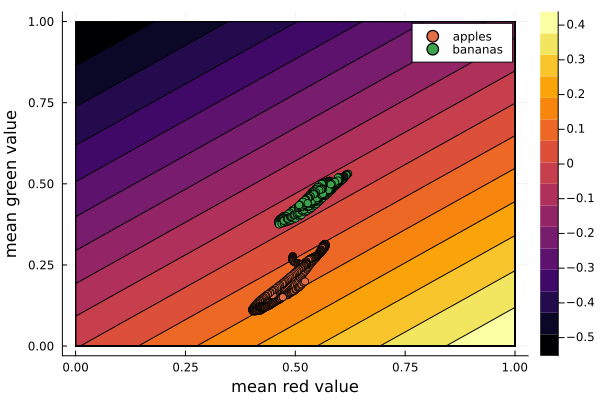

In [110]:
contour(0:0.1:1, 0:0.1:1, (x,y)-> modelB([x,y])[1], fill=true)
scatter!(first.(x_apples), last.(x_apples), label="apples")
scatter!(first.(x_bananas), last.(x_bananas), label="bananas")
xlabel!("mean red value")
ylabel!("mean green value")

In [111]:
pmB = Flux.params(modelB);

In [112]:
opt = Descent(0.1)
#opt = ADAM();

Descent(0.1)

In [113]:
Flux.train!(Loss, pmB, data, opt)

In [114]:
Loss(xs[1],ys[1])

0.9306692582611067

In [115]:
for i in 1:100
    Flux.train!(Loss, pmB, data, opt)
end

In [116]:
Loss(xs[1],ys[1])

0.5746426538194392

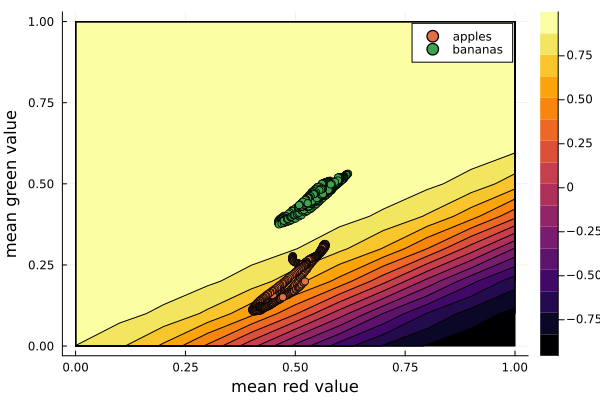

In [117]:
contour(0:0.1:1, 0:0.1:1, (x,y)-> modelB([x,y])[], fill=true)
scatter!(first.(x_apples), last.(x_apples), label="apples")
scatter!(first.(x_bananas), last.(x_bananas), label="bananas")
xlabel!("mean red value")
ylabel!("mean green value")

# Redes Neurais Profundas
<center>
<img src="data/deep-neural-net.png" style="width:200px">
</center>

In [18]:
apples = DataFrame(CSV.File("data/apples.dat",delim='\t', normalizenames=true));
bananas = DataFrame(CSV.File("data/bananas.dat",delim='\t',normalizenames=true));
grapes = DataFrame(CSV.File("data/Grape_White.dat",delim='\t',normalizenames=true));

In [14]:
grapes[end-5:end,:]

,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,84,99,0.604857,0.609105,0.420731
2,85,99,0.604634,0.609301,0.419876
3,84,98,0.606472,0.610819,0.422749
4,98,99,0.592942,0.608335,0.454372
5,98,99,0.593707,0.607731,0.453736
6,98,99,0.5919,0.60648,0.451744


In [19]:
x_apples = [ [row.red,row.green,row.blue] for row in eachrow(apples)];
x_bananas= [ [row.red,row.green,row.blue] for row in eachrow(bananas)];
x_grapes= [ [row.red,row.green,row.blue] for row in eachrow(grapes)];


In [25]:
xs = vcat(x_apples,x_bananas,x_grapes);

In [20]:
using Flux:onehot 

In [21]:
ys = vcat( fill(onehot(1,1:3), size(x_apples)),
           fill(onehot(2,1:3), size(x_bananas)),
           fill(onehot(3,1:3), size(x_grapes)));

In [42]:
data = zip(xs,ys);
#first(data,2)

In [45]:
layer1 = Dense(3,4,σ);
layer2 = Dense(4,3,σ);
model3to3 = Chain(layer1,layer2);

In [44]:
xs[1] |> layer1 |> layer2 

3-element Vector{Float64}:
 0.4704828748203078
 0.542154028986391
 0.433231808194825

In [46]:
pm3to3 = Flux.params(model3to3);

In [47]:
L3to3(x,y) = Flux.mse(model3to3(x),y)

L3to3 (generic function with 1 method)

In [53]:
L3to3(xs[1],ys[1])

0.4321733508825038

In [91]:
opt=Descent(0.1)
Flux.train!(L3to3, pm3to3, data, opt) 

In [55]:
L3to3(xs[1],ys[1])

0.3594976534143366

In [92]:
for i in 1:100
   Flux.train!(L3to3, pm3to3, data, opt) 
end

In [93]:
#L3to3(xs[1],ys[1])
xs[1]

3-element Vector{Float64}:
 0.5014661151631883
 0.22930441097534052
 0.14843600349425926

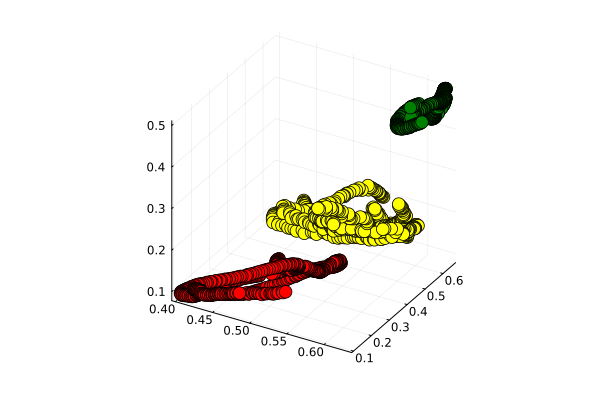

In [86]:
plot()
for i=1:length(x_apples)
    plt3d = Plots.plot!((x_apples[i][1],x_apples[i][2],x_apples[i][3]),
         seriestype=:scatter, 
        markersize = 7,
        label=:none,
        c =:red
        #c=RGB(x_apples[1][1],x_apples[1][2],x_apples[1][3])
        )   
end
for i=1:length(x_bananas)
    plt3d = Plots.plot!((x_bananas[i][1],x_bananas[i][2],x_bananas[i][3]),
         seriestype=:scatter, 
         markersize = 7,label=:none,
        c = :yellow
        #c=RGB(x_bananas[1][1],x_bananas[1][2],x_bananas[1][3])
        )   
end

for i=1:length(x_grapes)
    plt3d = Plots.plot!((x_grapes[i][1],x_grapes[i][2],x_grapes[i][3]),
         seriestype=:scatter, 
         markersize = 7,label=:none,
         c = :green
        #c=RGB(x_grapes[1][1],x_grapes[1][2],x_grapes[1][3])
        )   
end



display(plt3d)

In [108]:
round.(Int,model3to3(xs[1]))

3-element Vector{Int64}:
 1
 0
 0

In [103]:
round(Int,0.3)

0